# import

In [25]:
import pandas as pd
import numpy as np

from google_play_scraper import reviews, Sort

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from konlpy.tag import Okt
from collections import Counter

from pprint import pprint

# 데이터 수집

## 구글 playstore 리뷰 데이터

In [26]:
def gstore_reviews(app_id):
    # 리뷰 가져오기
    result = reviews(
        app_id,
        lang='ko',  # 한국어 리뷰
        country='kr',  # 한국
        sort=Sort.NEWEST,  # 최신 리뷰 먼저 가져오기
        count=100000  # 가져올 리뷰 수 (최대 100000)
    )

    # 리뷰 데이터
    review_data = result[0]

    # DataFrame으로 변환
    return pd.DataFrame(review_data)

### 코딩밸리

In [27]:
cdv_df = gstore_reviews("inc.ulift.cv") 

In [28]:
print(cdv_df.shape)
cdv_df.head(2)

(71, 11)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,fa6bd9f2-f89f-4e2a-862f-1e2577daf5df,권유진,https://play-lh.googleusercontent.com/a/ACg8oc...,강의 내용이 이해가 쏙쏙 됩니다.,5,0,2.11.4,2025-01-04 22:37:52,"안녕하세요 회원님, 코딩밸리입니다.\n앞으로도 저희 코딩밸리 강의에 만족하실 수 있...",2025-01-06 11:42:16,2.11.4
1,c4b09f59-4fc8-4bac-b1bd-40e4ae1ab084,노백현,https://play-lh.googleusercontent.com/a/ACg8oc...,코딩입문으로는 이 앱이 정말 좋은거 같습니다. 다만 아쉬운 점이 있다면 파이썬이랑 ...,5,1,2.11.0,2024-12-22 02:10:06,"안녕하세요 회원님, 코딩밸리입니다.\n우선 귀한 시간 내어 소중한 의견 전달해주셔서...",2024-12-27 12:54:10,2.11.0


### Duolingo

In [5]:
# duo_df = gstore_reviews("com.duolingo")

In [6]:
# print(duo_df.shape)
# duo_df.head(2)

(31052, 11)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,291762e4-d629-43d1-a653-5d1d33f154d7,Google 사용자,https://play-lh.googleusercontent.com/EGemoI2N...,너무 재밌고 공부도 잘 되는데 듀오링고 광고가 많이 나오는 것만 없으면 좋을 것 같아요,4,0,6.11.4,2025-01-07 20:59:32,None,None,6.11.4
1,73035dcb-9edf-4b7a-b1d0-56080f597a7c,Google 사용자,https://play-lh.googleusercontent.com/EGemoI2N...,이건 재밌고 초등학생들도 하면 재밌게 플레이 할꺼예요 별5개:),5,0,6.11.4,2025-01-07 20:59:02,None,None,6.11.4


### 뉴닉

In [29]:
nn_df = gstore_reviews("com.newneek.newneekapp")

In [30]:
print(nn_df.shape)
nn_df.head(2)

(331, 11)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d28a9387-a479-4583-8dc3-b01f2049b3d7,xv f,https://play-lh.googleusercontent.com/a-/ALV-U...,예전이랑 너무 많이 달라진 것 같네요 특히 1분 정도씩으로 요약해서 하루에 여러 기...,2,2,0.7.0,2025-01-05 18:47:37,None,NaT,0.7.0
1,de2996c8-482d-410f-bf4e-b39815d3ff13,Seunghwa Cho,https://play-lh.googleusercontent.com/a-/ALV-U...,글에 알맹이가 별로 없음,3,1,0.7.0,2025-01-04 23:22:42,None,NaT,0.7.0


### 솔로런

In [31]:
slr_df = gstore_reviews("com.sololearn")

In [32]:
print(slr_df.shape)
slr_df.head(2)

(806, 11)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,7c7ca4bb-d924-4559-b60a-ac413781363c,거북이와두루미,https://play-lh.googleusercontent.com/a-/ALV-U...,글씨가 작다. 너무. 다른 어플로 간다,1,0,4.87.0,2024-10-07 13:24:04,"Hey, Thanks for your feedback. We work tireles...",2024-10-13 23:09:26,4.87.0
1,15a801d9-e08d-4da9-9300-26bf20b11ef7,Max Lee,https://play-lh.googleusercontent.com/a-/ALV-U...,Unable to type in correct answers in javascrip...,1,0,4.75.1,2024-05-31 21:50:16,"Hello,\nWe are sorry for the caused inconvenie...",2024-06-04 22:41:26,4.75.1


### MIMO

In [33]:
mimo_df = gstore_reviews('com.getmimo')
print(mimo_df.shape)
mimo_df.head()

(286, 11)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,868ee219-fe63-46e0-9d05-a67ac82318bf,최유진,https://play-lh.googleusercontent.com/a/ACg8oc...,good,5,0,5.13,2025-01-11 14:52:22,None,NaT,5.13
1,a8982457-8a77-4a8e-960a-bd5b25ea34ba,김건호 (GeonKim),https://play-lh.googleusercontent.com/a-/ALV-U...,world's best! i would like to learn go lang on...,5,0,5.13,2025-01-08 08:29:27,None,NaT,5.13
2,94d0e1eb-20fe-4522-9627-a8befa2c7705,김민규,https://play-lh.googleusercontent.com/a-/ALV-U...,일단 프로버전을 결제해도 PC에서 프로젝트 같은 것들을 해보려면 또 MAX로 전환해...,3,0,5.13,2025-01-05 23:55:48,We apologize for any confusion. The Pro versio...,2025-01-13 23:01:52,5.13
3,a5c79fa0-4451-4510-b0de-bca454c788a2,TT F,https://play-lh.googleusercontent.com/a/ACg8oc...,good,5,0,5.13,2025-01-05 17:53:42,None,NaT,5.13
4,fe2d3268-1809-4553-9f9b-f0deafda2c1d,신주언,https://play-lh.googleusercontent.com/a-/ALV-U...,다 좋은데 한국어 지원해 줬으면 합니다.,4,0,5.13,2024-12-29 20:32:19,None,NaT,5.13


# 데이터 분석

In [63]:
# from konlpy.tag import Okt
# from sklearn.feature_extraction.text import CountVectorizer
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# def get_WordCloud(df):
#     okt = Okt()

#     # 명사, 동사만 추출하는 함수
#     def extract_words(text):
#         words = okt.pos(text)
#         return ' '.join([word for word, tag in words if tag in ['Noun', 'Verb']])

#     # 데이터 전처리 (명사, 동사 필터링)
#     df['filtered_content'] = df['content'].apply(extract_words)
    
#     # 단어 카운트 계산
#     vectorizer = CountVectorizer(
#         max_features=50,
#         stop_words=['은', '는', '이', '가', '을', '를', '의', '에', '과', '도', '에서', '하다']
#     )
#     word_counts = vectorizer.fit_transform(df['filtered_content'])
#     word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts.toarray().sum(axis=0)))
    
#     # 워드클라우드 생성
#     wordcloud = WordCloud(font_path="C:\\Windows\\Fonts\\malgun.ttf", width=800, height=400).generate_from_frequencies(word_freq)
    
#     # 결과 출력
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis('off')
#     plt.show()


In [39]:
# # 워드 클라우드 생성을 위해 모든 문자열을 하나로 합치기
# combined_text = ' '.join(cdv_df['content'].astype(str))
# t = Okt()
# tokens_ko = t.nouns(combined_text) # 명사 분석
# b

In [73]:
# pip install stopwords

In [35]:
from konlpy.tag import Okt
from wordcloud import WordCloud
from stopwords import get_stopwords
from collections import Counter

def get_WordCloud(df, title):
    okt = Okt()

    # 한국어 불용어
    korean_stopwords = set(get_stopwords(language='korean'))
    custom_stopwords = {
        '이', '그', '저', '것', '나', '너', '우리', '저희', '그들', '그녀', 
        '입니다', '하', '이것', '저것', '다', '되다', '하다', '있다', '없다', 
        '과', '도', '의', '는', '은', '를', '이', '가', '에서', '에', '을',
        '아주','진짜','정말','가장','너무','정말로','대해','대하여','이건','모든','저건','통해',
        '제발','자꾸','계속','이후','부분','완전','그냥','걍','이면','때문'
    }
    total_stopwords = korean_stopwords.union(custom_stopwords)
    
    
    combined_text = ' '.join(df['content'].astype(str))
    
    tokens_ko = okt.nouns(combined_text)
    
    filtered_tokens = [word for word in tokens_ko if word not in total_stopwords and len(word) > 1]

    word_freq = Counter(filtered_tokens)
    
    top_words = word_freq.most_common(80)
#     print("상위 50개 단어:", top_100_words)  # 상위 50개 단어 출력
    
    wordcloud = WordCloud(
        font_path="C:\\Windows\\Fonts\\malgun.ttf",  # Windows 한글 폰트 경로
        width=800,
        height=400,
        background_color='grey',  # 배경색
        colormap='Pastel1',  # 색상 맵 (색상 팔레트)
#         max_font_size=200,  # 최대 폰트 크기
#         min_font_size=10,  # 최소 폰트 크기
        max_words=80,  # 최대 단어 수
#         contour_color='black',  # 단어 클라우드 외곽선 색상
#         contour_width=1,  # 외곽선 두께
#         random_state=42,  # 결과 일관성 유지

    ).generate_from_frequencies(dict(top_words))
    
    # 워드 클라우드 출력
    plt.figure(figsize=(10, 10))
    plt.title(title, fontsize=18, fontweight='bold', loc = 'left')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') 
#     _= plt.tight_layout()
    plt.show()

## 코딩밸리

### Word Cloud

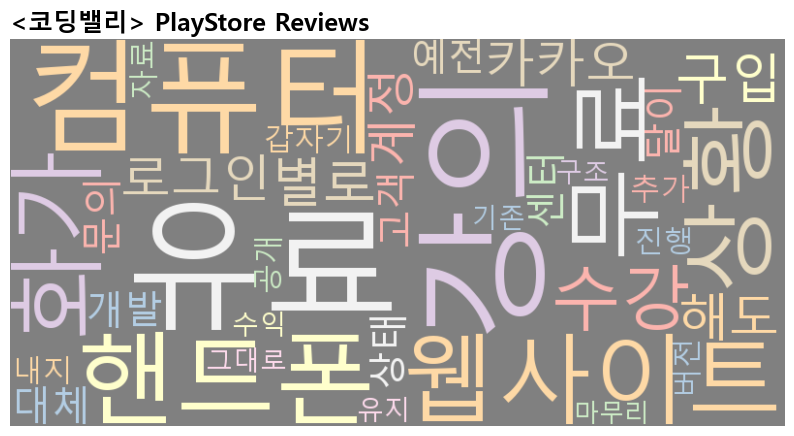

In [36]:
df1 = cdv_df.loc[cdv_df['score']<=2]
get_WordCloud(df1, "<코딩밸리> PlayStore Reviews")

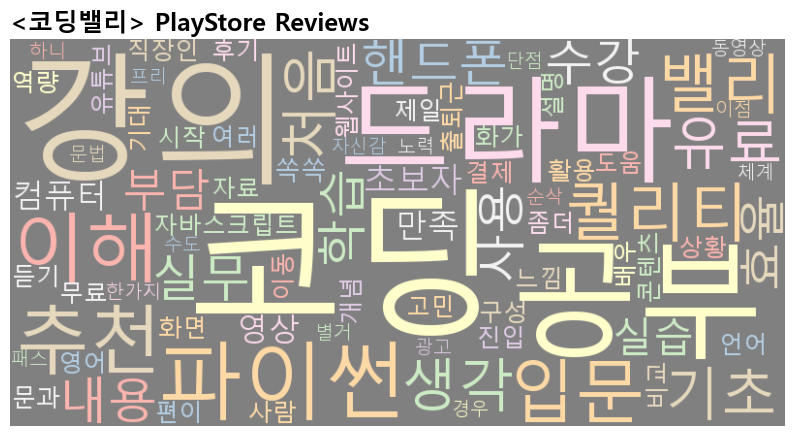

In [37]:
get_WordCloud(cdv_df, "<코딩밸리> PlayStore Reviews")

In [147]:
# # 한글 불용어 사전 다운로드 (필요시 실행)
# nltk.download('stopwords')
# nltk.download('punkt')

## Duolingo

### Word Cloud

In [38]:
# get_WordCloud(duo_df, "<듀오링고> PlayStore 리뷰")

## 뉴닉

### Word Cloud

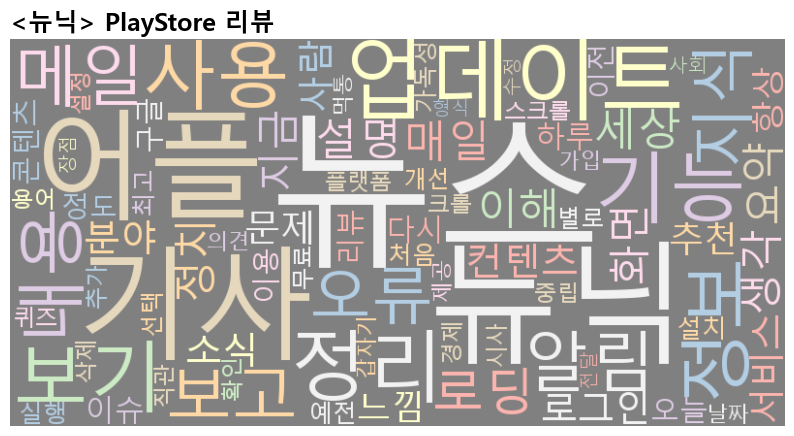

In [39]:
get_WordCloud(nn_df, '<뉴닉> PlayStore 리뷰')

## 솔로런

### WordCloud

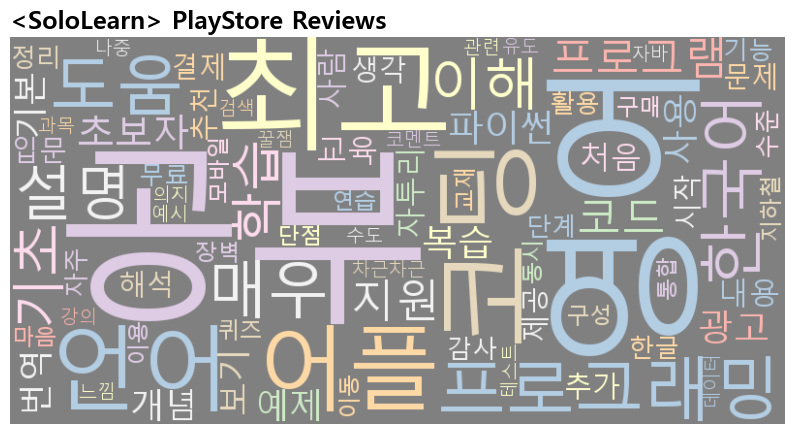

In [40]:
get_WordCloud(slr_df, "<SoloLearn> PlayStore Reviews")

## MIMO

### Word Cloud

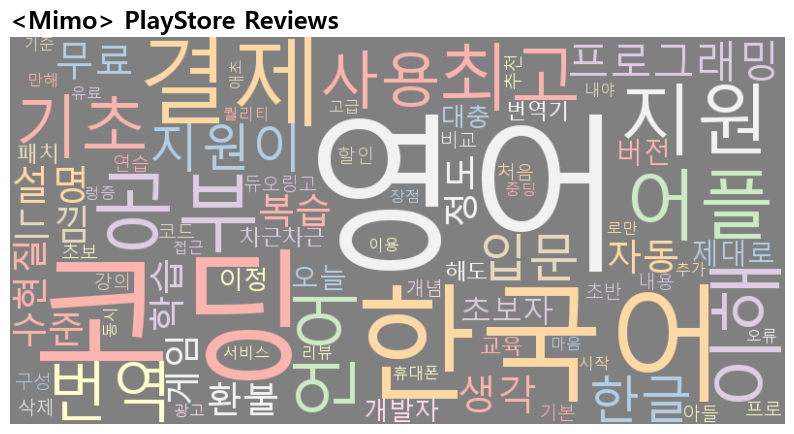

In [41]:
get_WordCloud(mimo_df, "<Mimo> PlayStore Reviews")